# Playground Notebook <a class="tocSkip">



<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/armando-fandango/ezml"><img src="https://colab.research.google.com/img/colab_favicon.ico" style="width:30px;" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/armando-fandango/ezml"><img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Logo.png" style="width:70px;" vspace="7px"/>View source on GitHub</a>
  </td>
</table>

In [4]:
import sys
import os
from pathlib import Path

print('Python: ', sys.version)
print('Python executable: ', sys.executable)

%reload_ext autoreload
%autoreload 2

EZAI_ROOT = Path.home()
# EZAI_ROOT = Path('d:/') / 'work'
EZAI_ROOT=EZAI_ROOT / 'projects' / 'ezai'
EZAI_ROOT=str(EZAI_ROOT)
print('loading EZAI from ',EZAI_ROOT)
if not EZAI_ROOT in sys.path:
    sys.path.append(EZAI_ROOT)
import ezai

from ezai.util import util
util.m_info([ezai])

Python:  3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]
Python executable:  /opt/conda/envs/ezai/bin/python
loading EZAI from  /home/armando/projects/ezai
ezai 0.1.0-dev


In [5]:
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import display as ipd

from os import environ as os_environ
os_environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # 0: all, 1: skip INFO 2: skip 1,WARNING 3: skip 1,2,ERROR 
import tensorflow as tf
# this wont work: tf.get_logger().setLevel('ERROR')

import torch

util.m_info([np,pd,mpl,sns])
util.m_info([tf,torch]) 

numpy 1.19.1
pandas 1.1.0
matplotlib 3.3.0
seaborn 0.10.1
tensorflow 2.3.0
torch 1.6.0


In [6]:
from ezai.util import log_util
logger = log_util.get_logger()

## GPU Tests

In [7]:
!nvidia-smi

Thu Aug  6 03:37:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.95.01    Driver Version: 440.95.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro P5000        On   | 00000000:01:00.0 Off |                  N/A |
| N/A   77C    P0    48W /  N/A |  15434MiB / 16278MiB |     10%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [8]:
from ezai.util import tf_util
tf_util.gpu_test()

ezai - I - TensorFlow CUDA version is installed
ezai - I - TensorFlow Default GPU Device:/device:GPU:0
ezai - I - # of GPU Devices:1


True

In [9]:
from ezai.util import pt_util
pt_util.gpu_test()

ezai - I - Torch Current GPU Device # and name:0 Quadro P5000
ezai - I - # of GPU Devices:1


## Temporal Model

In [19]:
from ezai.data import temporal
from ezai.util import scalers

<AxesSubplot:>

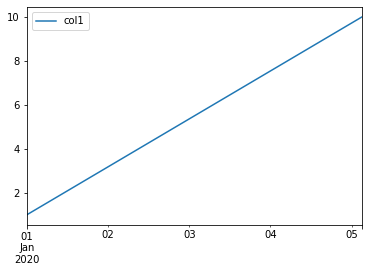

In [11]:
n_rows = 100
idx = pd.date_range('2020-01-01', periods=n_rows, freq='H')
s = pd.Series(np.linspace(1,10,n_rows), index=idx)
df1d = pd.DataFrame({'col1':np.linspace(1,10,n_rows)},index=idx)
df1d.plot()

In [12]:
ipd(df1d.head())

,col1
2020-01-01 00:00:00,1.000000
2020-01-01 01:00:00,1.090909
2020-01-01 02:00:00,1.181818
2020-01-01 03:00:00,1.272727
2020-01-01 04:00:00,1.363636


In [15]:
xy_df, (x_cols,y_cols) = temporal.df_to_xy(df1d,dim3=False)
ipd(xy_df.head())

,col1_t-0,col1_t+1
2020-01-01 00:00:00,1.000000,1.090909
2020-01-01 01:00:00,1.090909,1.181818
2020-01-01 02:00:00,1.181818,1.272727
2020-01-01 03:00:00,1.272727,1.363636
2020-01-01 04:00:00,1.363636,1.454545


In [17]:
xy_cols = list(set(x_cols+y_cols))
print(xy_cols)

['col1_t-0', 'col1_t+1']


In [21]:
scaler_xy = scalers.MinMaxScaler().fit(xy_df[xy_cols].to_numpy())
sdf = scaler_xy.transform(xy_df[xy_cols])
ipd(sdf.head())

,col1_t-0,col1_t+1
2020-01-01 00:00:00,0.000000,0.000000
2020-01-01 01:00:00,0.010204,0.010204
2020-01-01 02:00:00,0.020408,0.020408
2020-01-01 03:00:00,0.030612,0.030612
2020-01-01 04:00:00,0.040816,0.040816


In [23]:
from traffic_flow.experiments import n2_data
xy = n2_data.exp_n2_to_xy(id_df,conf=conf1)
print(xy.shape)

NameError: name 'id_df' is not defined